In [1]:
import sys
import os
import numpy as np
import pyBigWig
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom

# Append the parent directory to sys.path
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from utils.bw_loader import bigwig_to_arrays_by_chrom

In [2]:
from pomegranate import BetaDistribution, State, PoissonDistribution, NormalDistribution, GeneralMixtureModel, HiddenMarkovModel

In [3]:
ctcf_chr1_path = '/global/scratch/users/dixonluinenburg/whole_genome_bigwigs/GM12878_CTCF_deep/chr1'
hia5_path = '/global/scratch/users/dixonluinenburg/whole_genome_bigwigs/Hia5-free/chr1'

In [54]:
ctcf_bedfile = '/global/scratch/projects/vector_streetslab/jmarcus/dimelo_data/CTCF.motifs.known.chm13v1.1.bed'

In [65]:
chr1_motifs = []
with open(ctcf_bedfile) as f:
    for line in f:
        if (line.split('\t')[0]=='chr1'):
            chr1_motifs.append(int(line.split('\t')[1]))

In [66]:
chr1_motifs_array = np.array(chr1_motifs)

In [81]:
print(chr1_motifs_array)

[51780 51781 34103 ... 34104 51781 51782]


In [67]:
start_co = 10_000_000
end_co = 20_000_000
valid_array,mod_array = bigwig_to_arrays_by_chrom(hia5_path,'hia5_free_','mA','chr1',start_co,end_co)

In [6]:
print(np.sum(mod_array)/np.sum(valid_array))

0.01028105042039145


In [68]:
bins = np.arange(0,10000000,100)

In [69]:
mod_data = np.nan_to_num(np.add.reduceat(mod_array,bins))
valid_data = np.nan_to_num(np.add.reduceat(valid_array,bins))

In [76]:
list_of_sequences = []
list_of_startcos = []
for i in range(100):
#     mod_data_subset = (mod_data[1000*i:1000*i+1000])[((valid_data>0) & (mod_data>0))[1000*i:1000*i+1000]]
#     valid_data_subset = (valid_data[1000*i:1000*i+1000])[((valid_data>0) & (mod_data>0))[1000*i:1000*i+1000]]
#     print(len(valid_data_subset))
#     list_of_sequences.append(mod_data[1000*i:1000*i+1000])+0.0000001
    list_of_startcos.append(1000*100*i + start_co)
    list_of_sequences.append((mod_data[1000*i:1000*i+1000]+0.0000001)/(valid_data[1000*i:1000*i+1000]+0.0001))

In [48]:
print(list_of_sequences)

[array([1.08695534e-09, 9.99999100e-03, 1.44927438e-02, 6.66666222e-10,
       7.14285204e-10, 1.72413653e-02, 9.09090174e-03, 1.81818026e-02,
       2.72727034e-02, 2.08333127e-02, 9.61537633e-03, 9.99999000e-10,
       9.99999000e-10, 1.11110988e-09, 8.62068222e-10, 9.25925069e-10,
       1.21951071e-09, 1.38888696e-09, 1.13636235e-09, 2.77777006e-09,
       1.61290062e-09, 1.61290062e-09, 1.53845917e-09, 1.69491238e-09,
       2.04081216e-09, 2.17390832e-09, 1.92307322e-09, 2.22221728e-09,
       1.99999600e-09, 1.66666389e-09, 1.75438289e-09, 2.04081216e-09,
       1.66666389e-09, 1.44927341e-02, 4.76189736e-02, 8.47456208e-02,
       1.78571110e-09, 1.85184842e-09, 1.96078047e-09, 2.43901844e-09,
       1.69491238e-09, 2.04081216e-09, 2.27272211e-09, 1.88678889e-09,
       2.17390832e-09, 2.27272211e-09, 1.75438289e-09, 2.17390832e-09,
       1.23456638e-09, 1.81817851e-09, 1.11110988e-09, 1.31578774e-09,
       1.38888696e-09, 1.72413496e-09, 1.31578774e-09, 1.23456638e-09,
     

In [96]:
p_values = []
for i in range(len(mod_data)):
    p_values.append(1-binom.cdf(mod_data[i],valid_data[i],0.00845))

In [97]:
p_values_array = np.array(p_values)

/tmp/ipykernel_119655/1306200222.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([12000,12200,0,1])


(12000.0, 12200.0, 0.07943282347242812, 1.0)

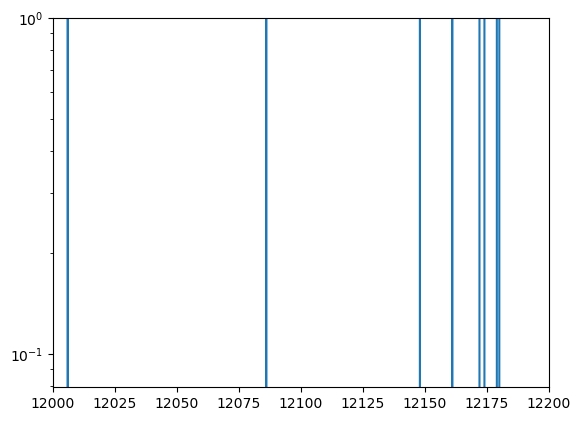

In [98]:
plt.plot(np.arange(10000,20000),p_values_array<1e-10)
plt.semilogy()
plt.axis([12000,12200,0,1])

/tmp/ipykernel_119655/2534836309.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(10000,20000),mod_data / valid_data)


(12000.0, 12200.0, 0.0, 1.0)

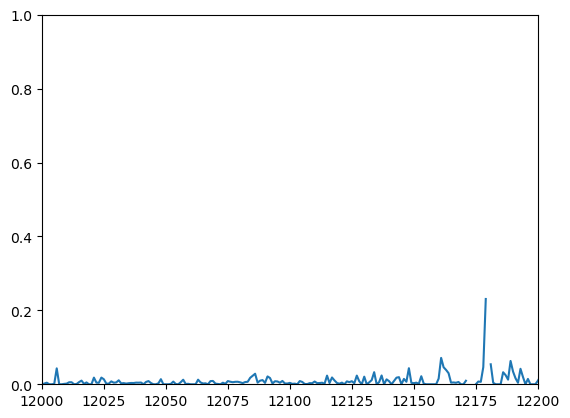

In [100]:
plt.plot(np.arange(10000,20000),mod_data / valid_data)
plt.axis([12000,12200,0,1])

In [192]:
beta_background = BetaDistribution(0.2,40)
beta_peak = BetaDistribution(10,400)

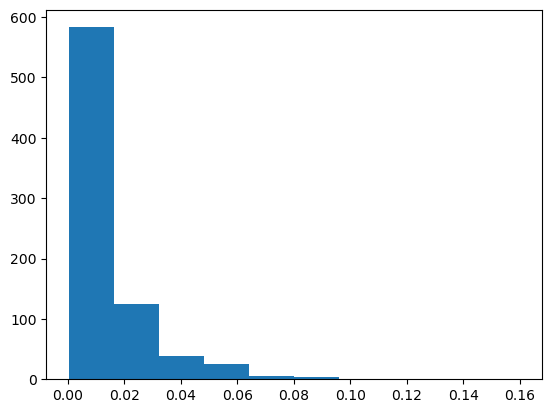

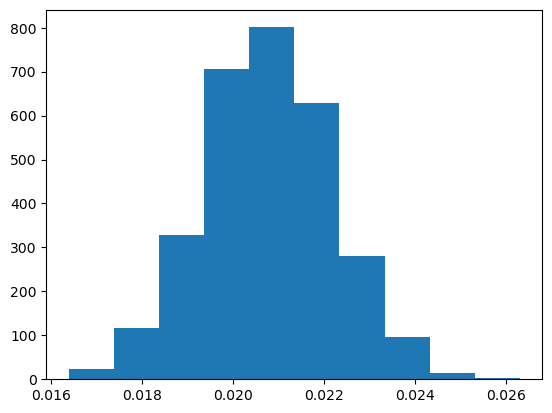

[208.0, 9792.0]
[0.0, 782.0]


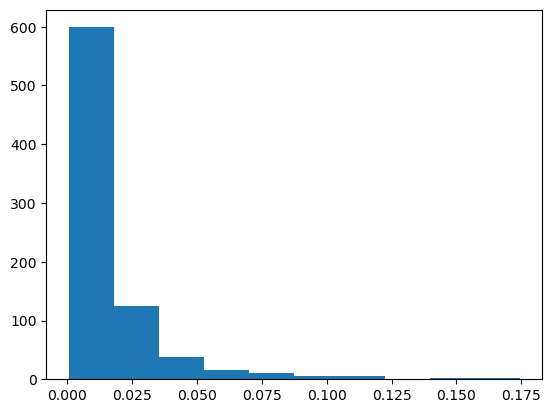

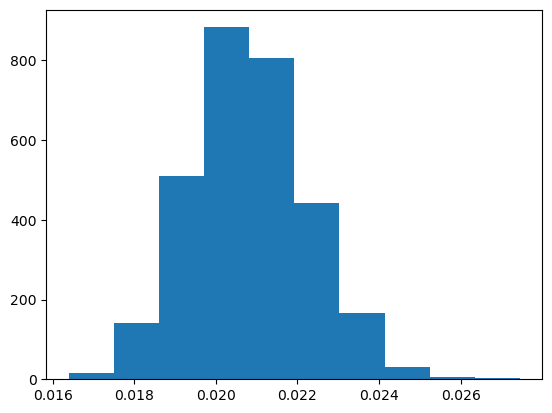

[208.0, 9792.0]
[0.0, 801.0]


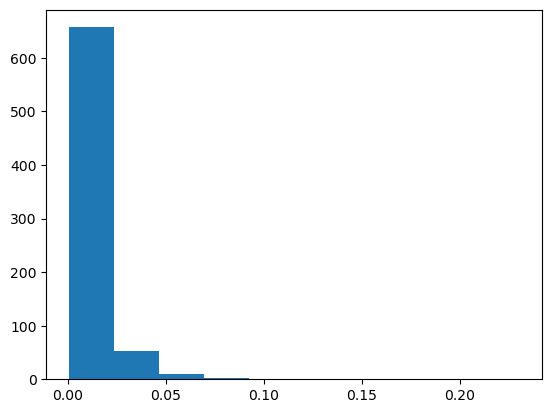

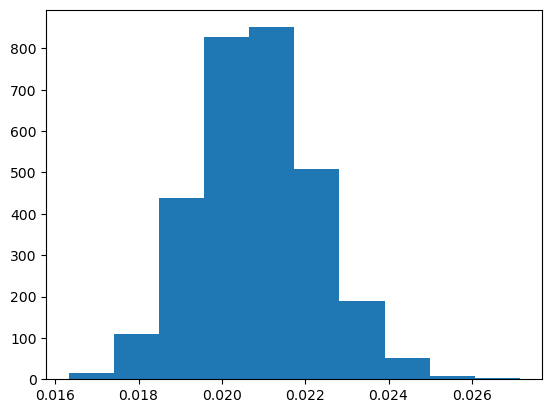

[208.0, 9792.0]
[0.0, 723.0]


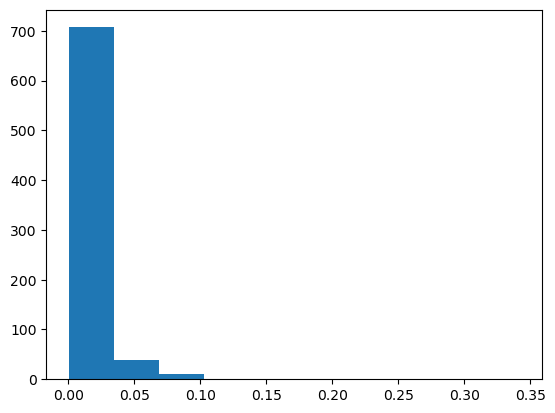

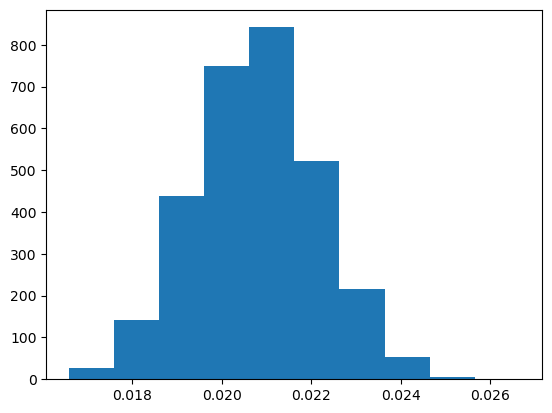

[208.0, 9792.0]
[0.0, 756.0]


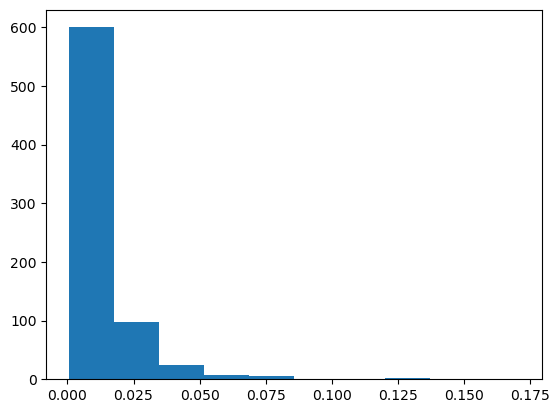

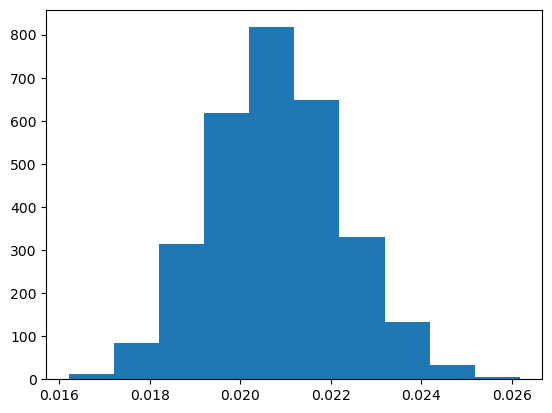

[208.0, 9792.0]
[0.0, 739.0]


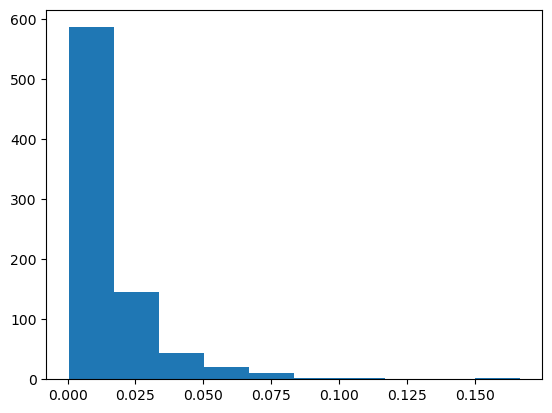

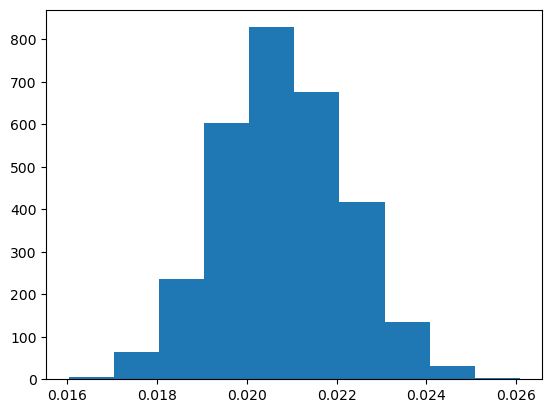

[208.0, 9792.0]
[0.0, 815.0]


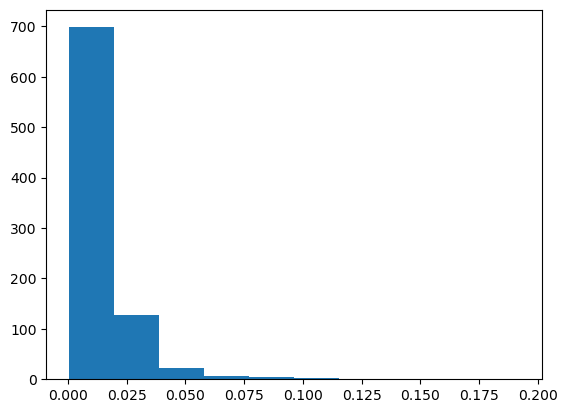

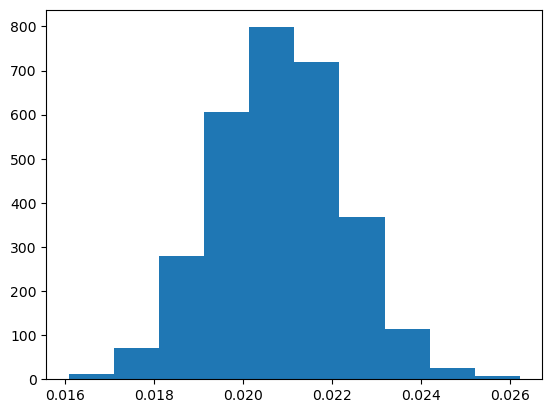

[208.0, 9792.0]
[0.0, 864.0]


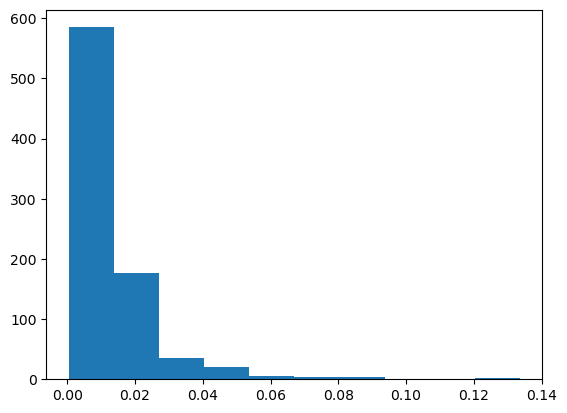

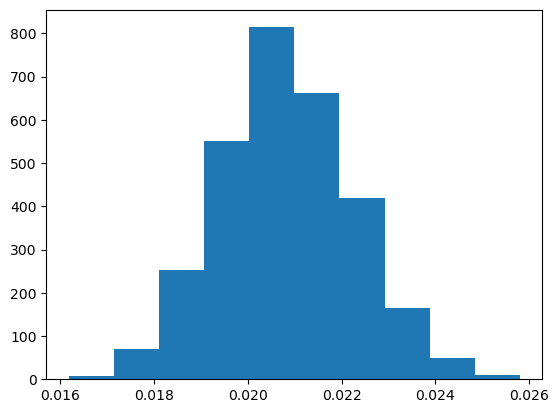

[208.0, 9792.0]
[0.0, 832.0]


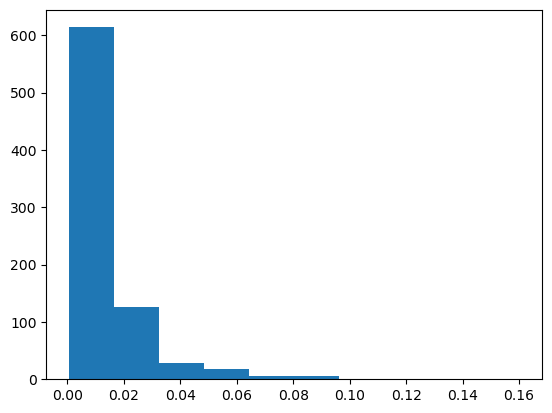

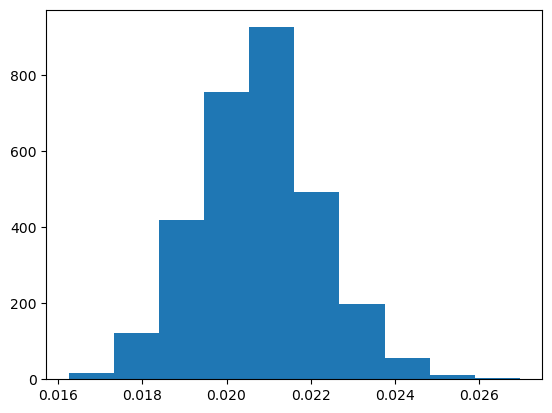

[208.0, 9792.0]
[0.0, 800.0]


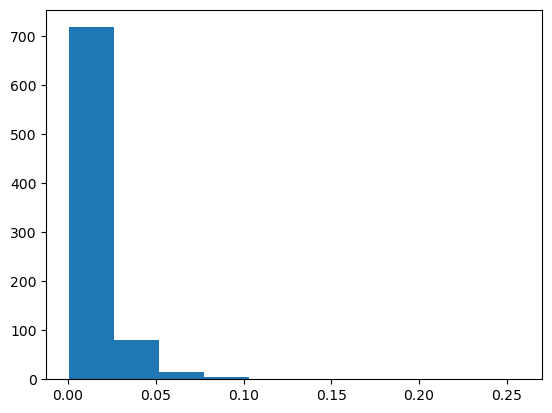

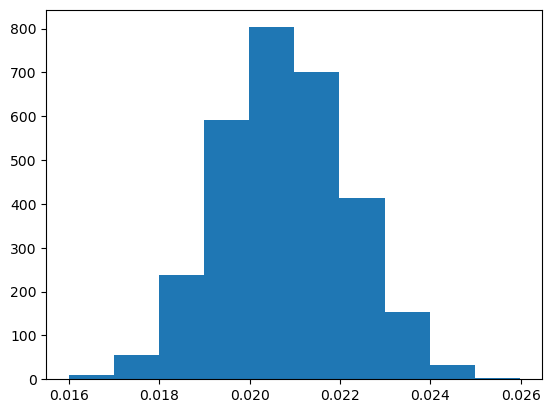

[208.0, 9792.0]
[0.0, 820.0]


In [195]:
for sequence in list_of_sequences:
    plt.hist(sequence)
    plt.show()
    beta_background.fit((mod_data+0.01)/(valid_data+0.01))
    plt.hist(beta_background.sample(n=3000))
    plt.show()
    print(beta_background.parameters)
#     print(sequence)
    beta_background.fit(sequence)
    print(beta_background.parameters)


[208.0, 9792.0]


(array([  81.,  952., 2572., 2905., 2024.,  954.,  377.,  108.,   21.,
           6.]),
 array([0.00404348, 0.00967427, 0.01530506, 0.02093584, 0.02656663,
        0.03219742, 0.0378282 , 0.04345899, 0.04908978, 0.05472057,
        0.06035135]),
 <BarContainer object of 10 artists>)

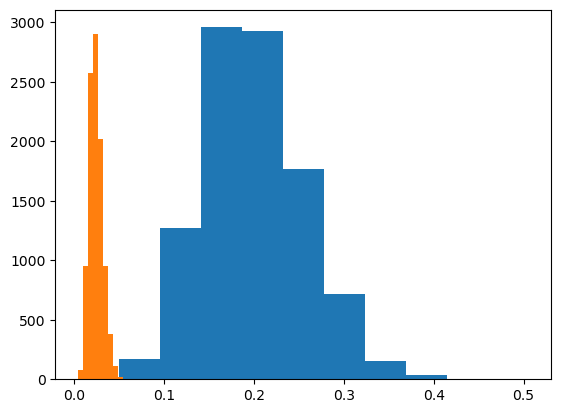

In [124]:
plt.hist(beta_background.sample(n=10000))
plt.hist(beta_peak.sample(n=10000))

In [72]:
state1 = State(NormalDistribution(0,0.01))
state2 = State(NormalDistribution(0.01,0.1))
state3 = State(NormalDistribution(0.03,0.1))
model = HiddenMarkovModel(name='CTCF_Peaks')

In [73]:
model.add_transition(model.start,state1,0.9)
model.add_transition(model.start,state2,0.098)
model.add_transition(model.start,state3,0.002)
model.add_transition(state1, state1, 0.9)       # transition probability from state1 to state1
model.add_transition(state1, state2, 0.08)       # transition probability from state1 to state2
model.add_transition(state1, state3, 0.02)
model.add_transition(state2, state1, 0.05)       # transition probability from state2 to state1
model.add_transition(state2, state2, 0.9)
model.add_transition(state2, state3, 0.05)
model.add_transition(state3, state1, 0.2)       # transition probability from state2 to state1
model.add_transition(state3, state2, 0.3)
model.add_transition(state3, state3, 0.5)
model.add_transition(state1, model.end, 0.1)    # transition probability from state1 to end
model.add_transition(state2, model.end, 0.1)    # transition probability from state2 to end
model.add_transition(state3, model.end, 0.1)    # transition probability from state1 to end

In [74]:
model.bake()

In [75]:
model.fit(list_of_sequences,max_iterations=100,stop_threshold=0.001)

{
    "class" : "HiddenMarkovModel",
    "name" : "CTCF_Peaks",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "CTCF_Peaks-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "CTCF_Peaks-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    0.017329457165691703,
                    0.012780121354044556
                ],
                "frozen" : false
            },
            "name" : "0416b7bc-c7b7-4dcd-932b-c1f46849c572",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
    

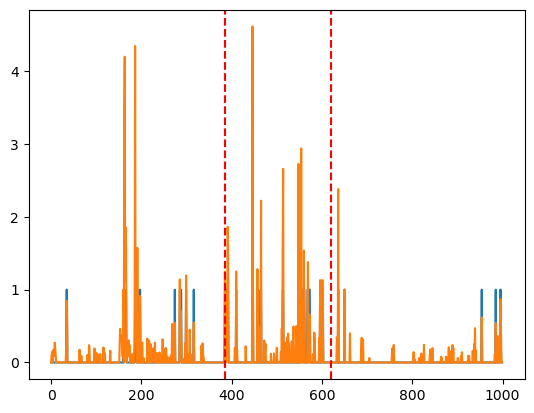

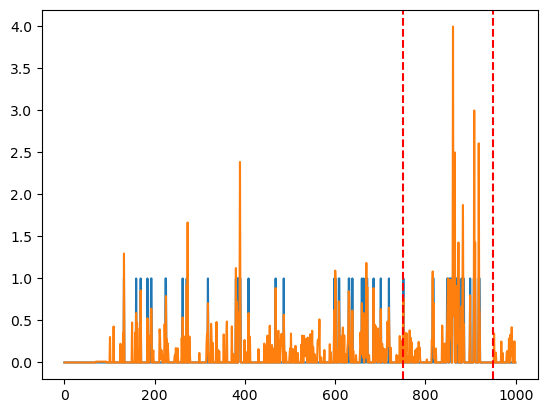

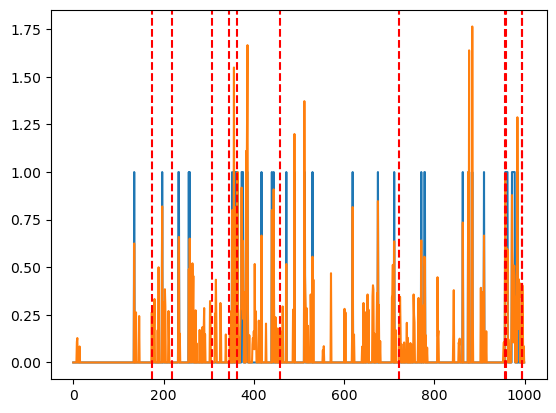

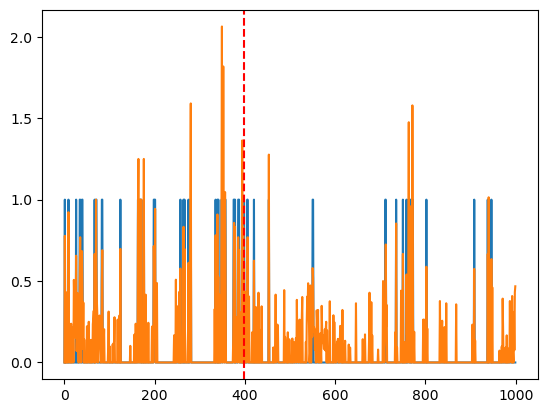

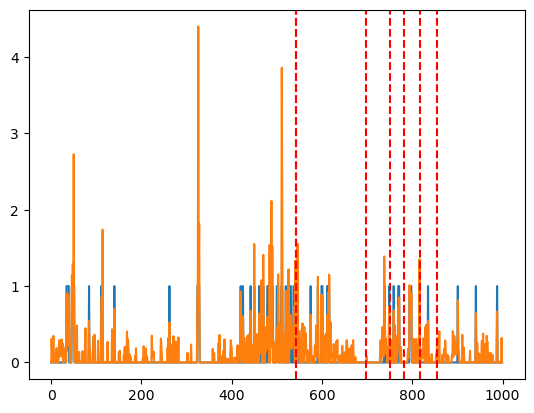

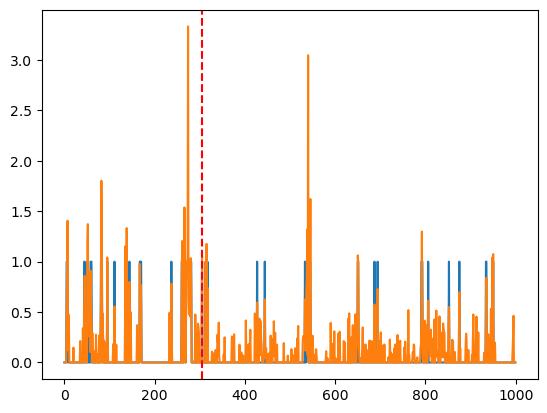

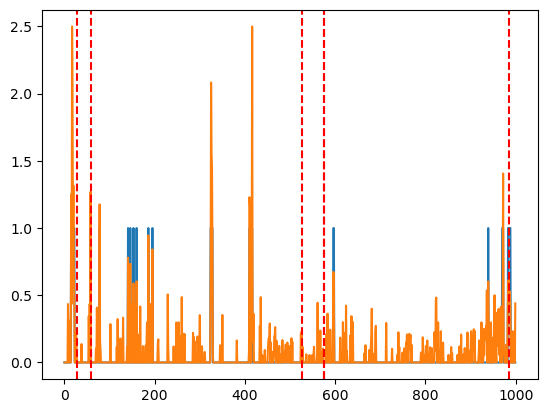

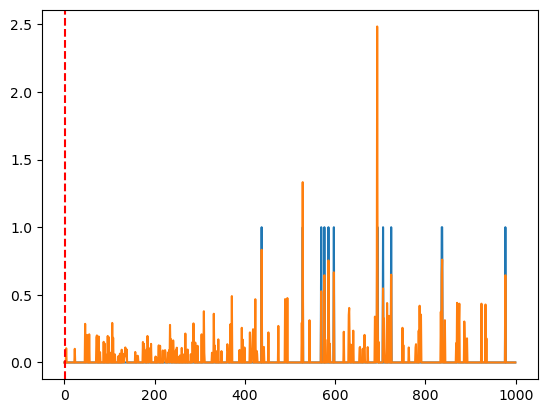

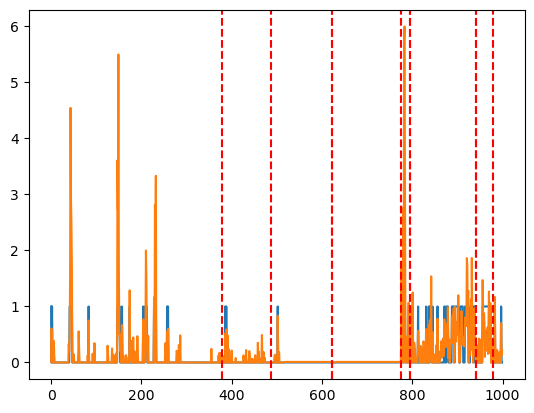

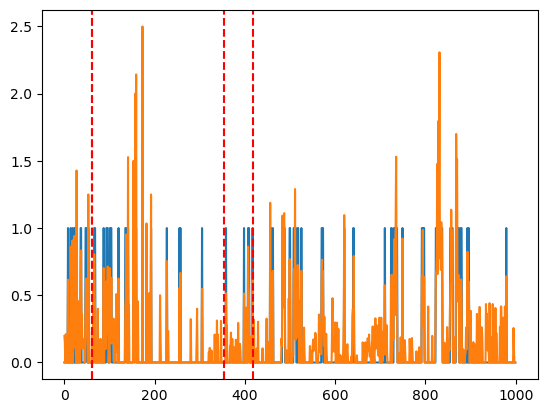

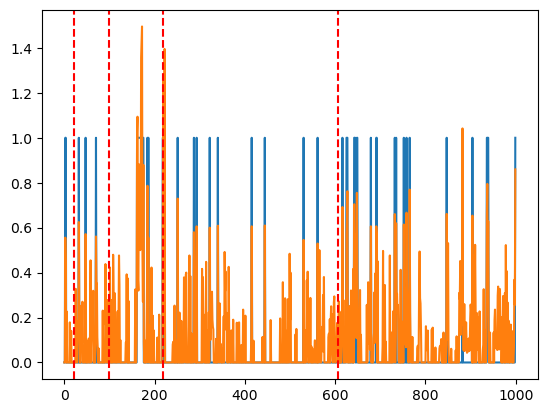

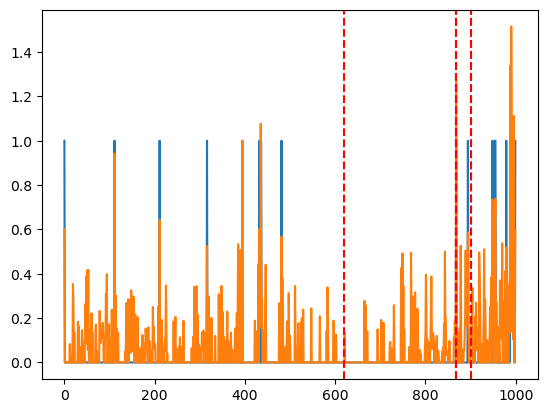

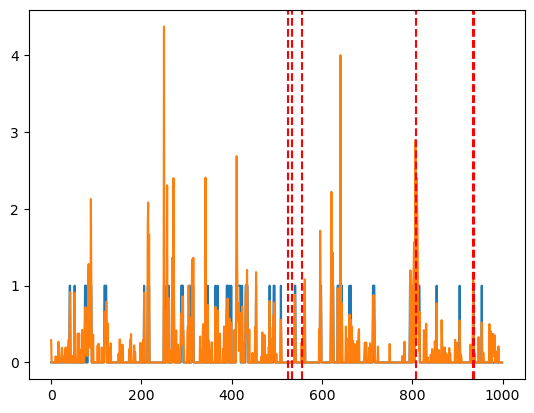

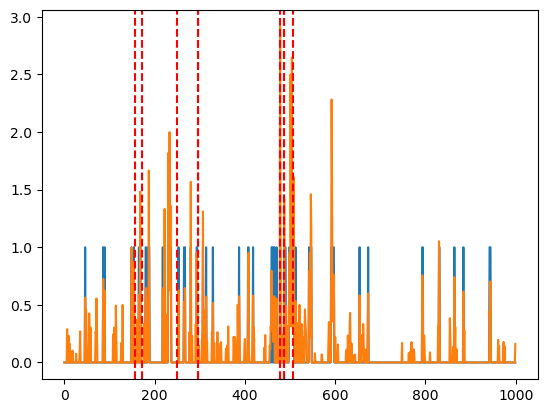

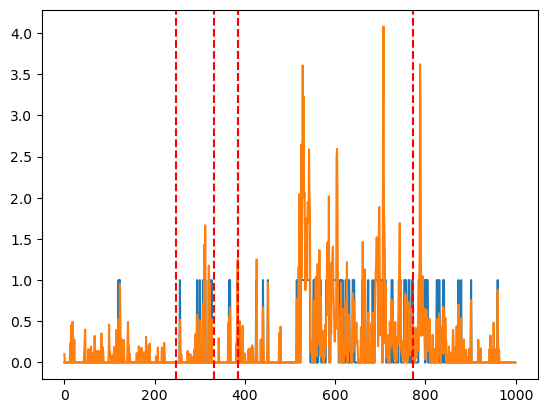

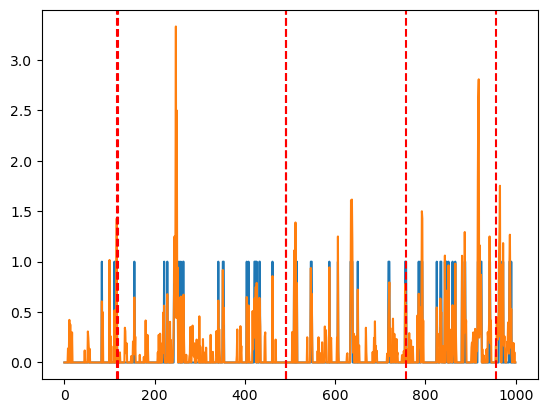

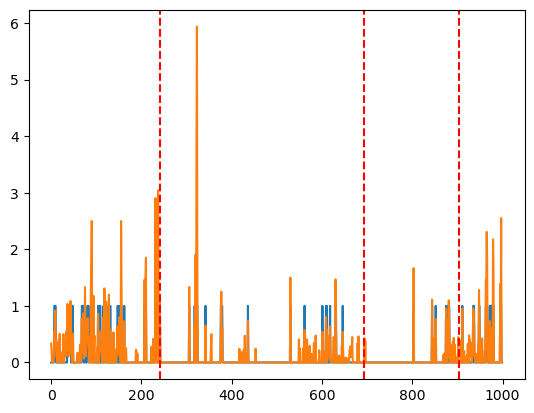

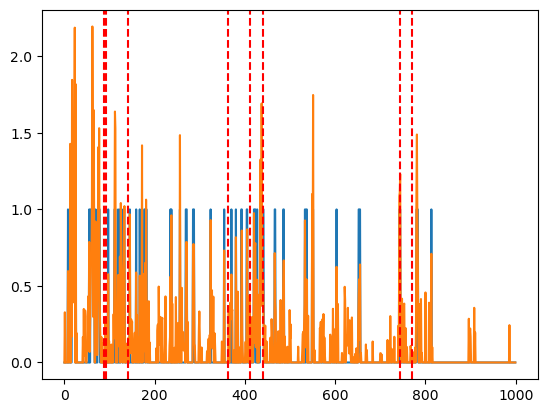

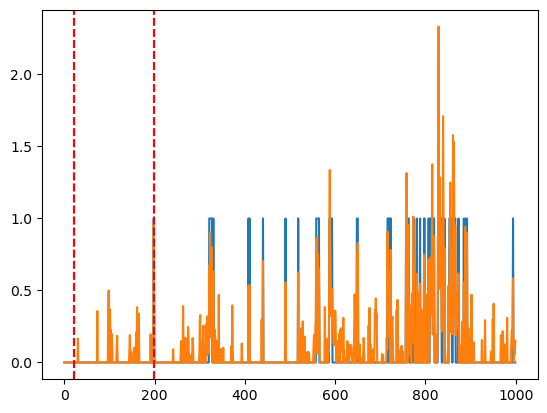

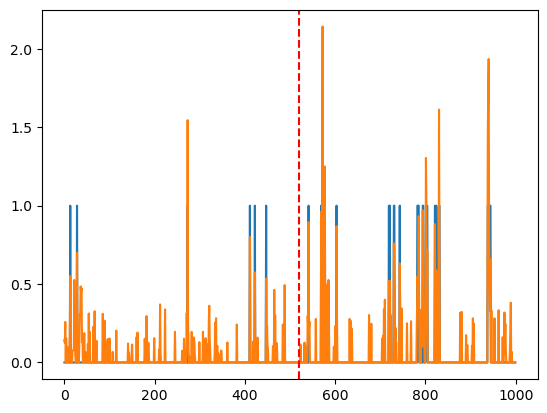

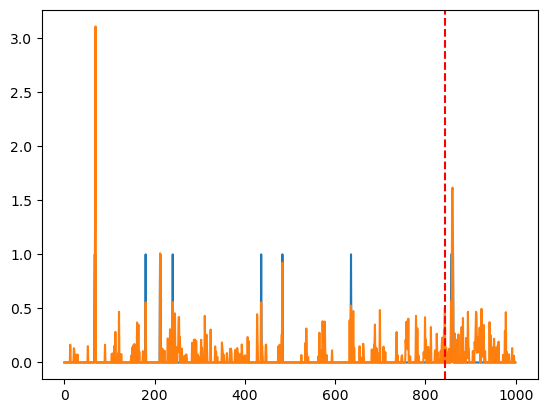

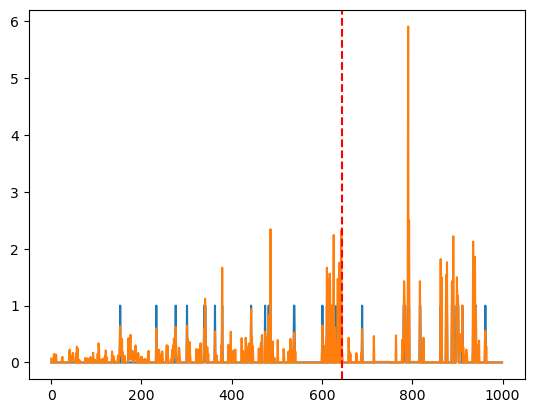

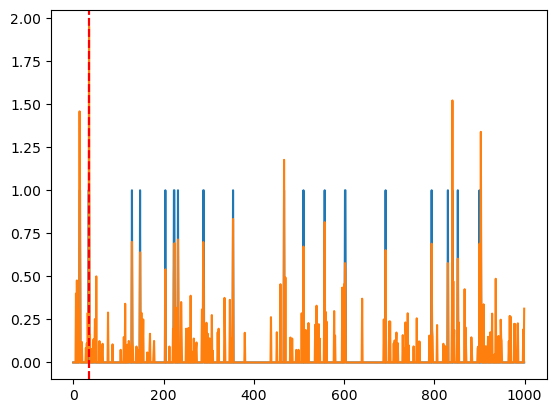

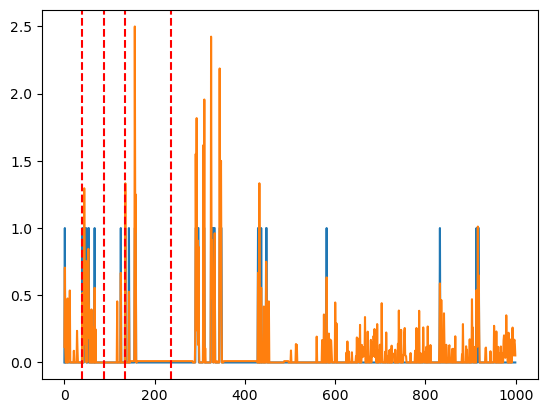

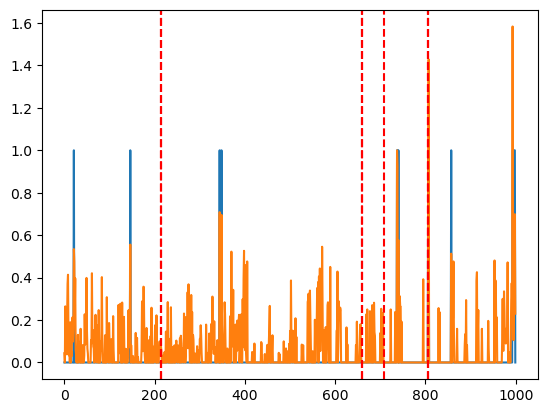

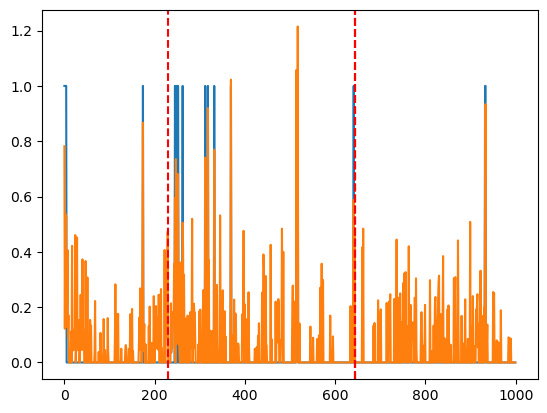

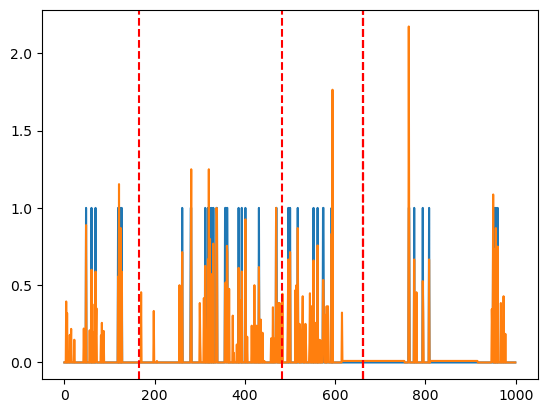

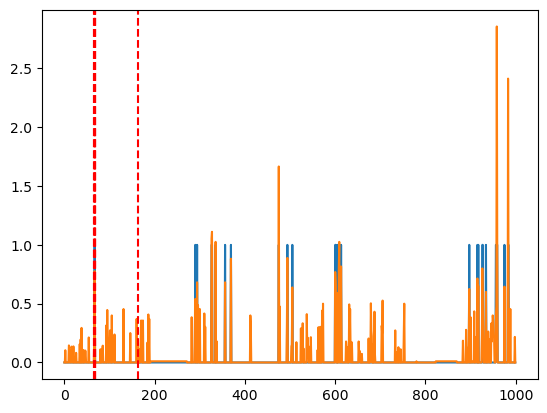

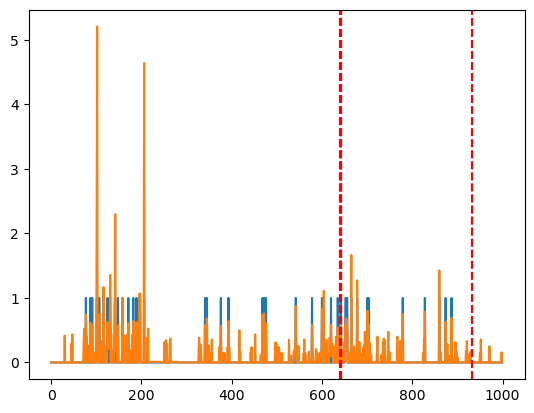

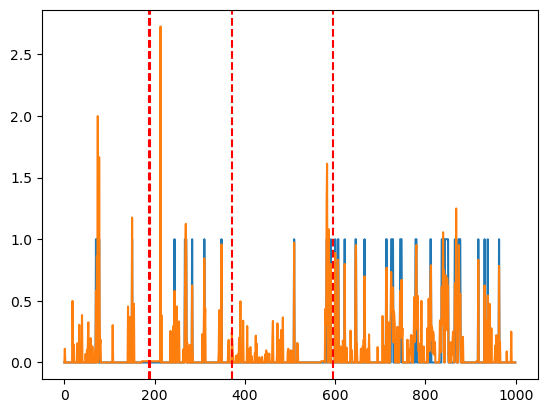

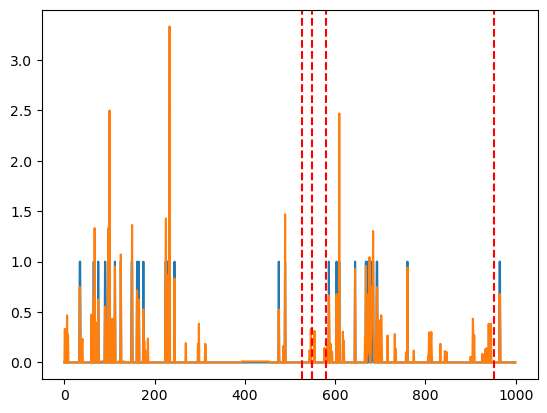

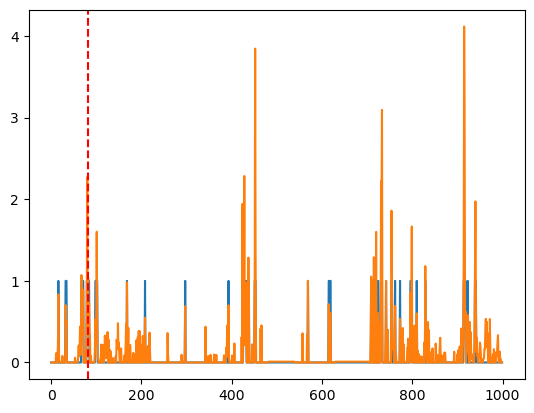

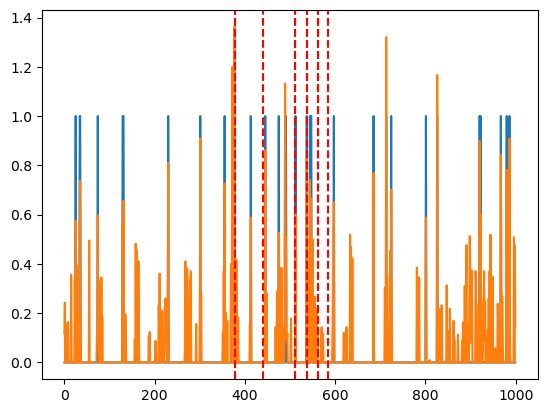

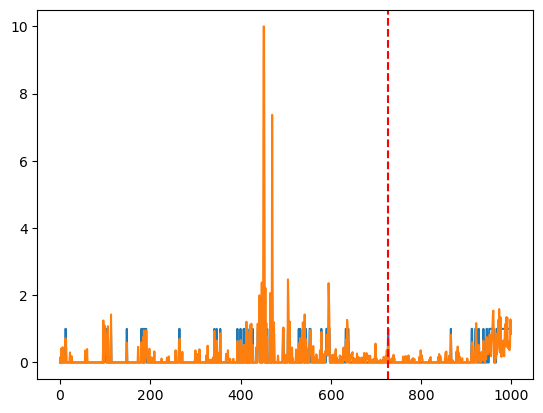

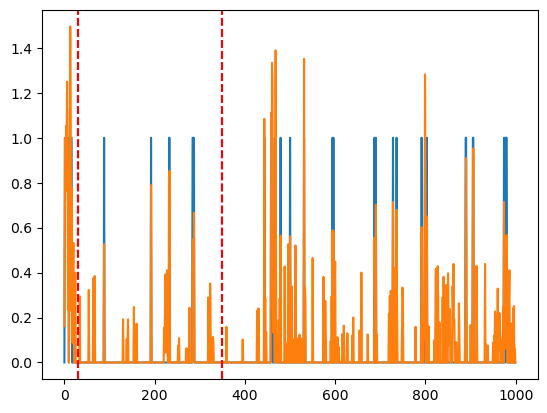

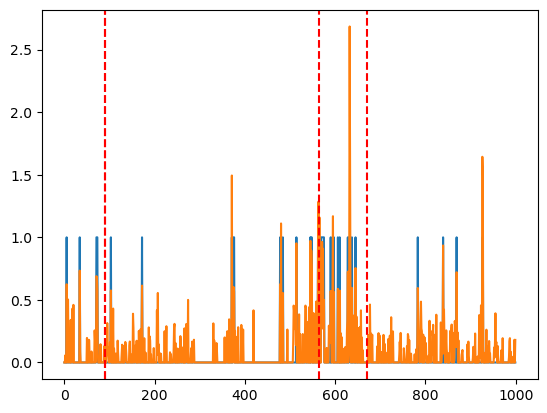

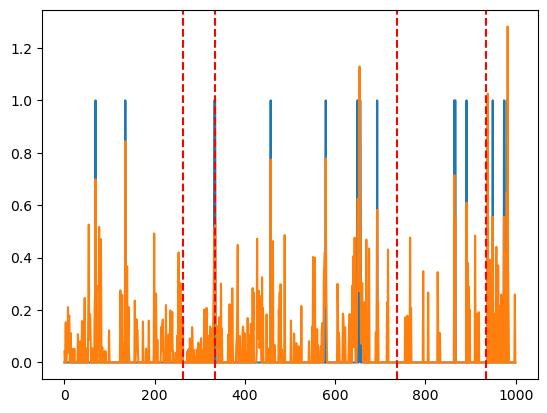

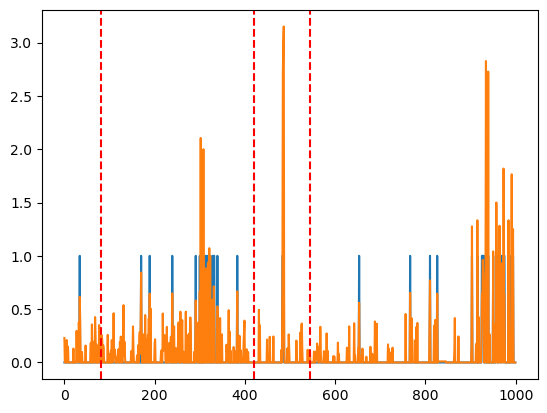

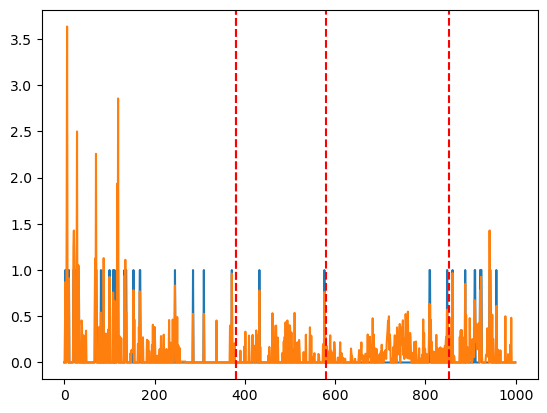

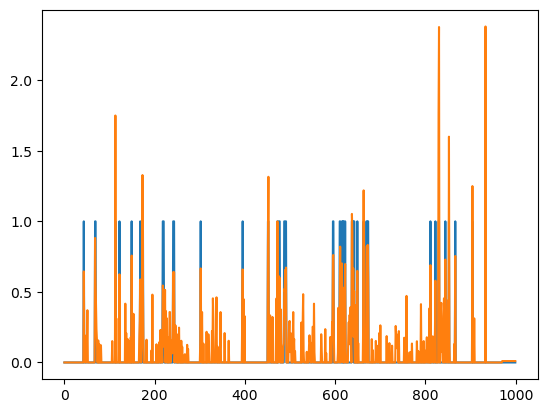

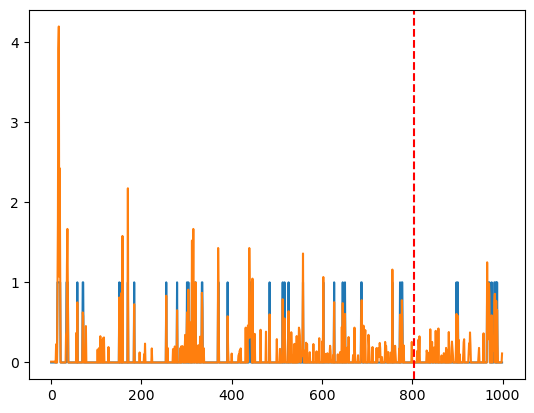

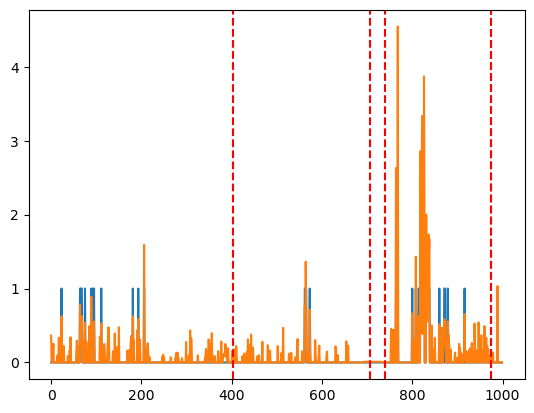

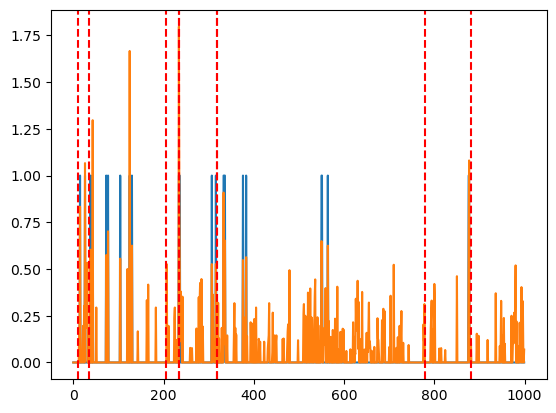

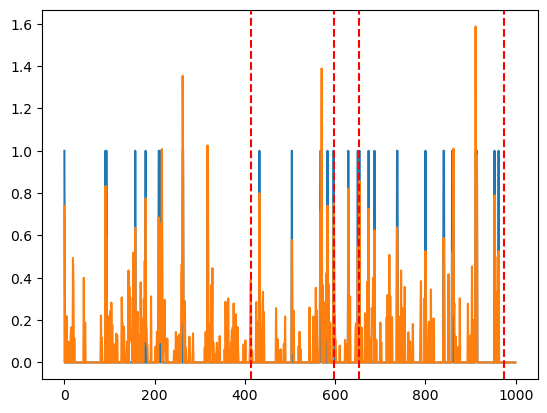

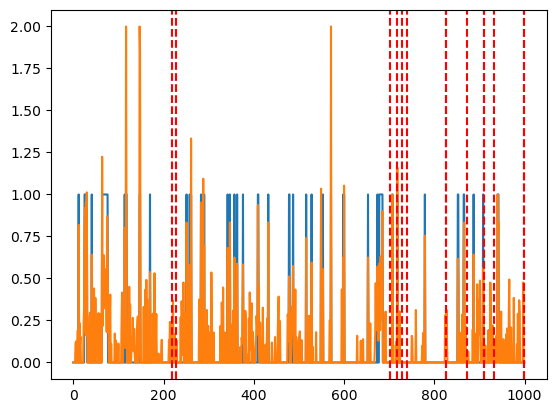

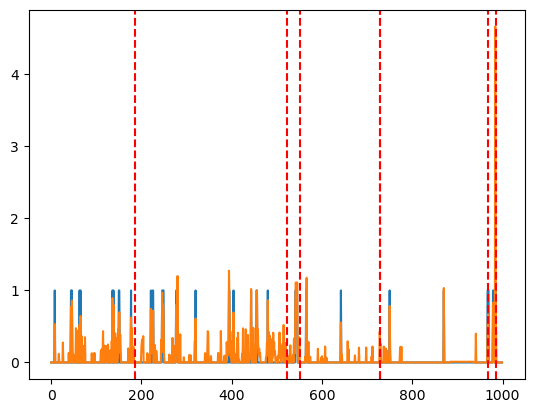

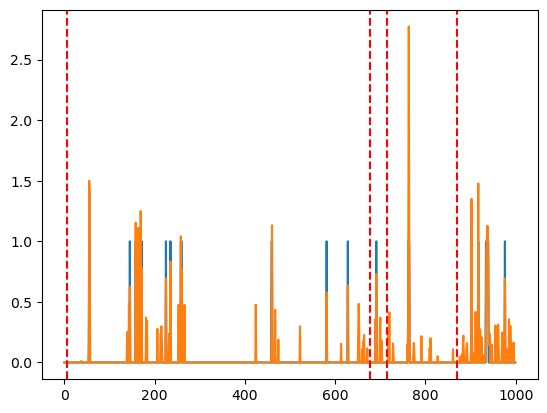

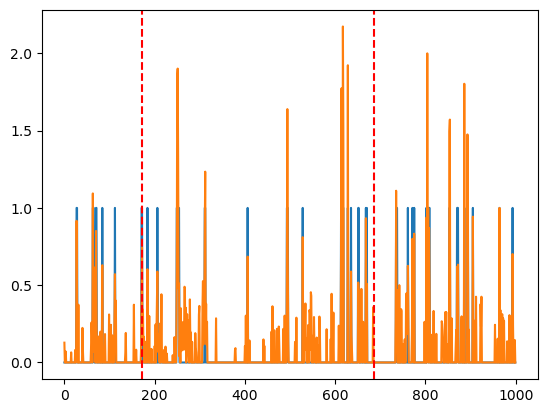

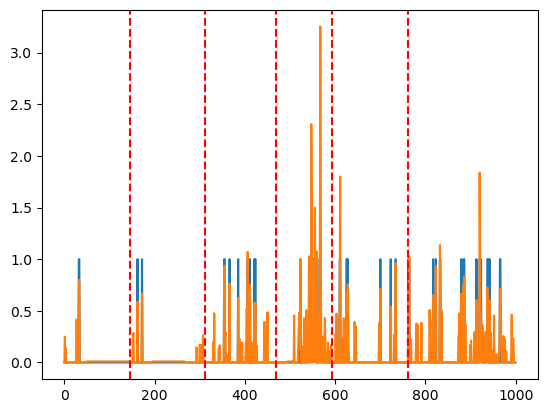

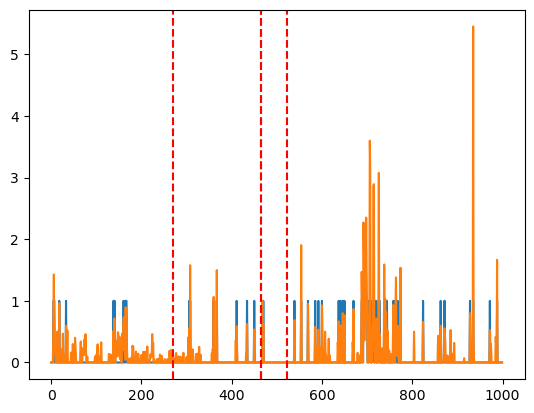

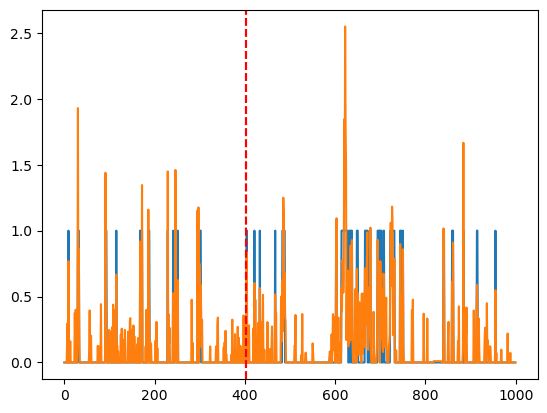

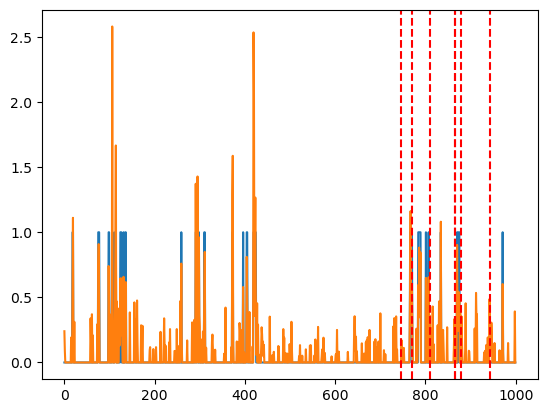

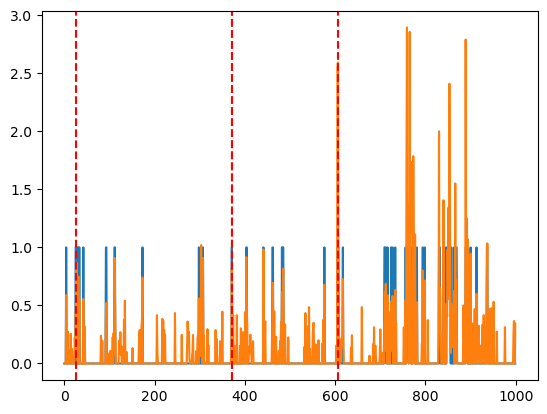

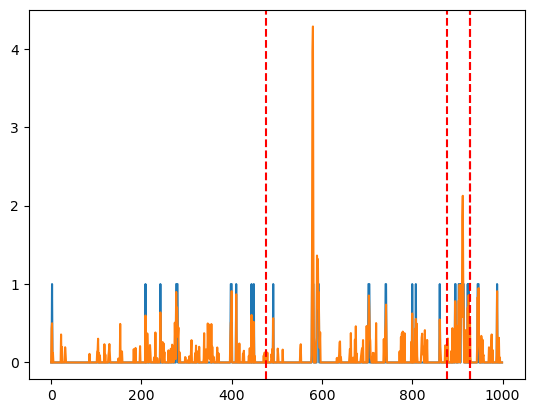

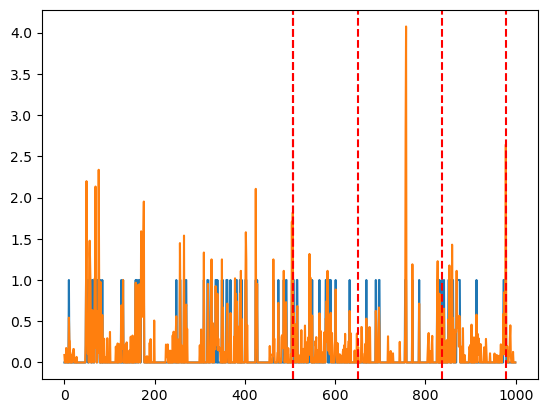

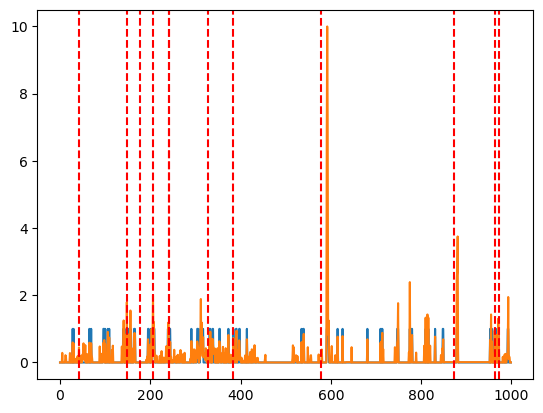

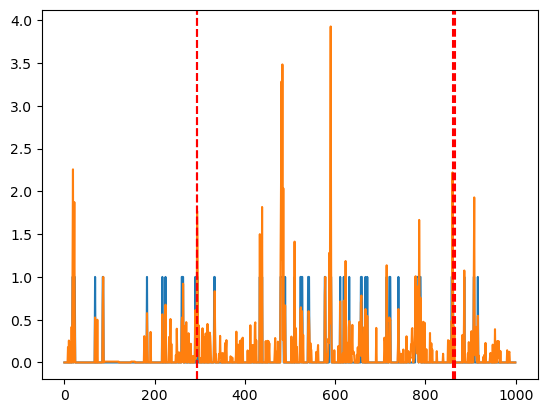

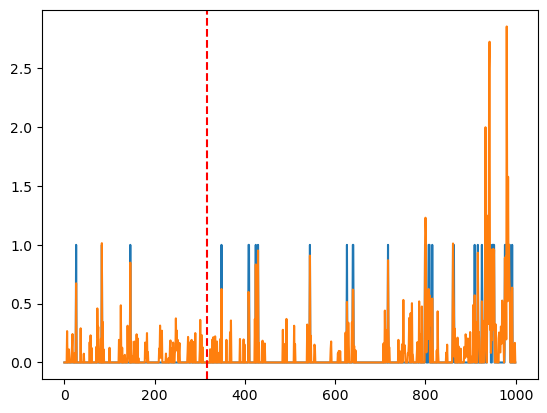

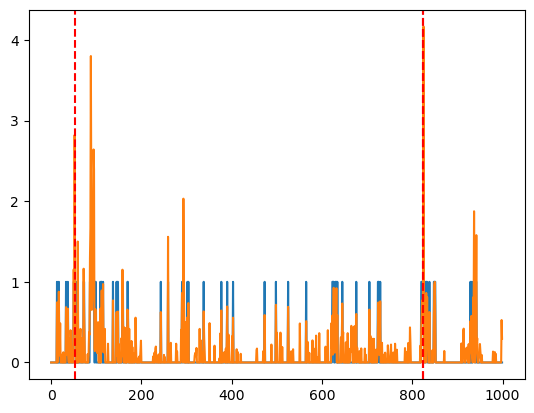

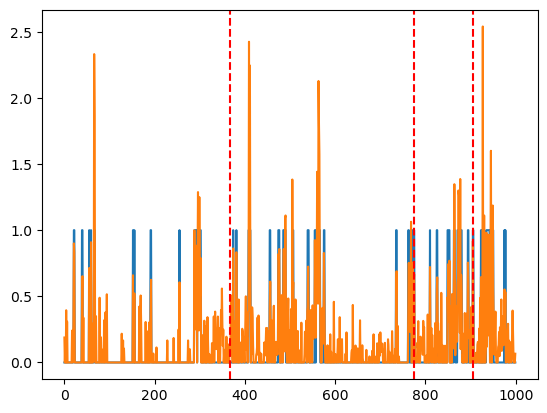

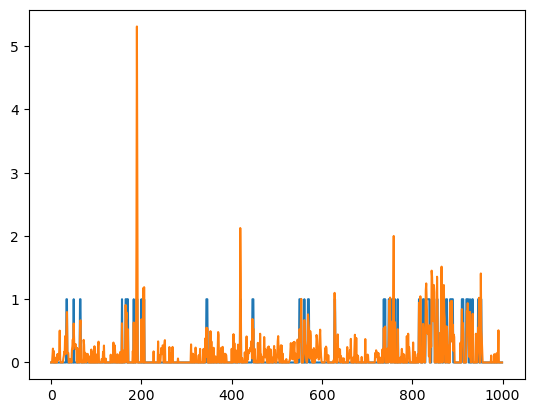

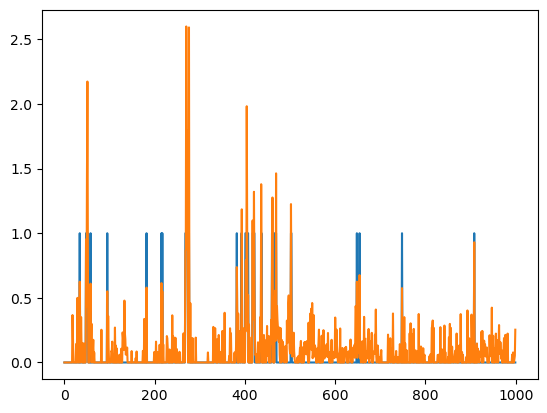

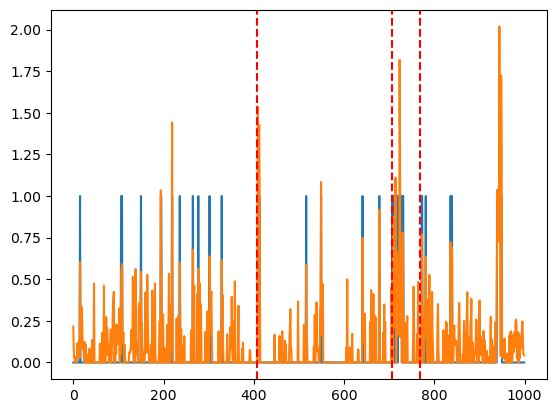

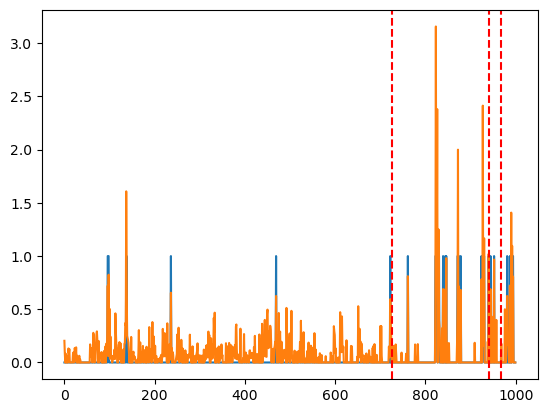

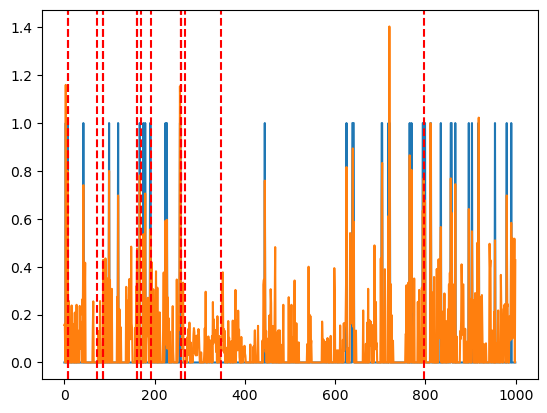

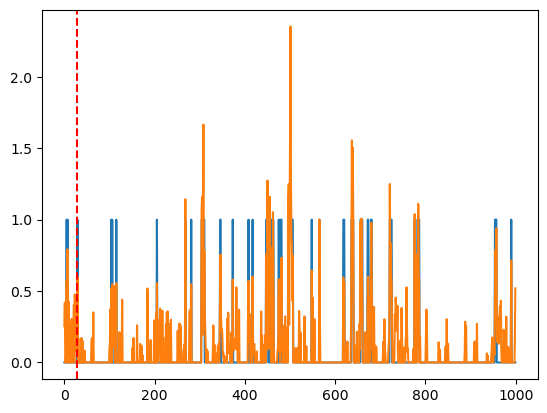

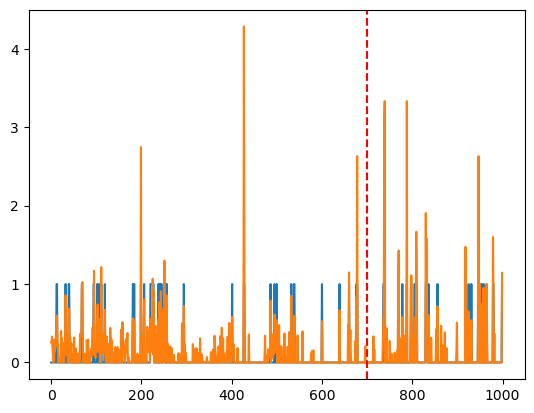

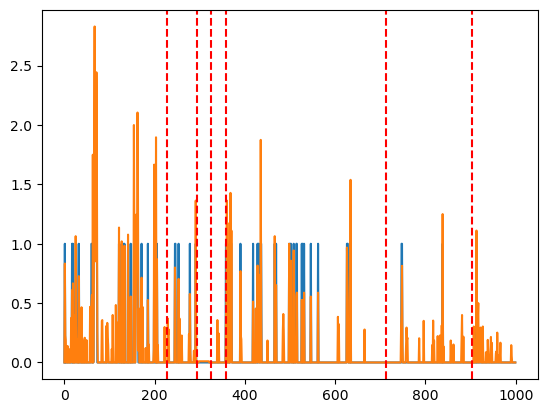

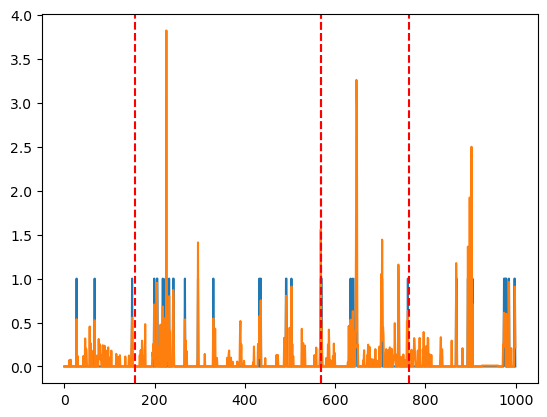

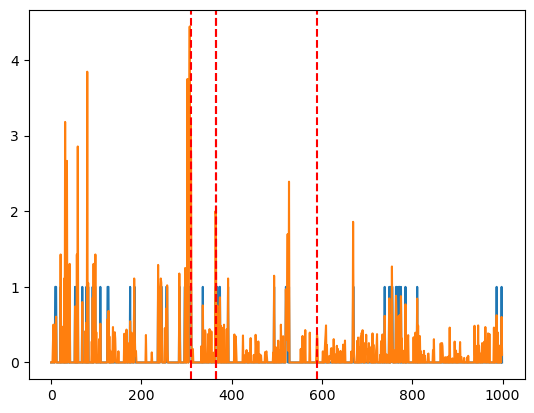

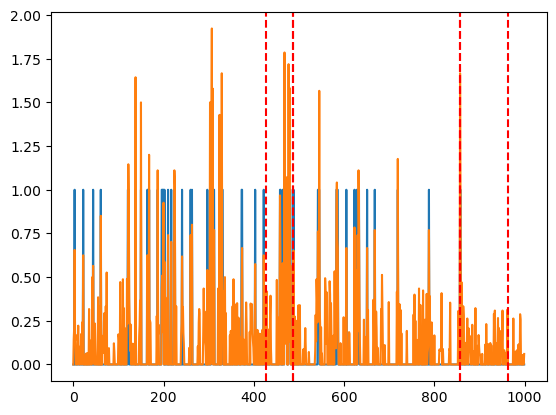

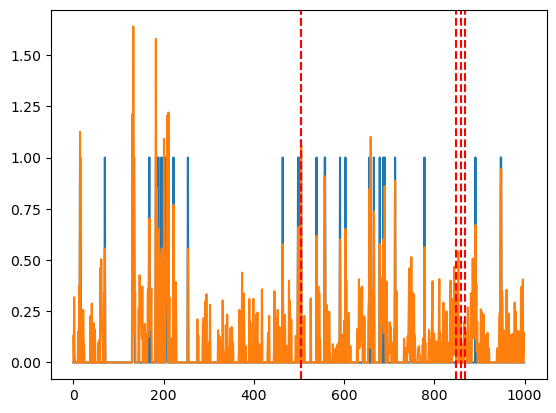

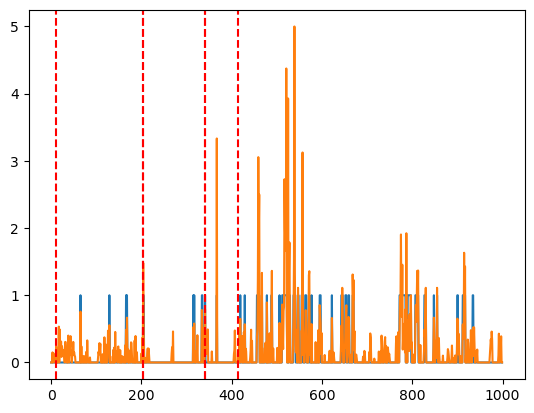

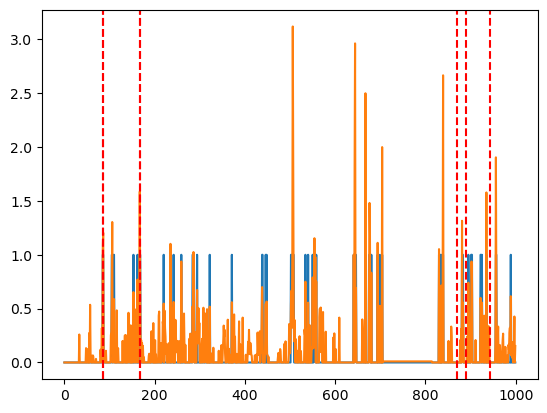

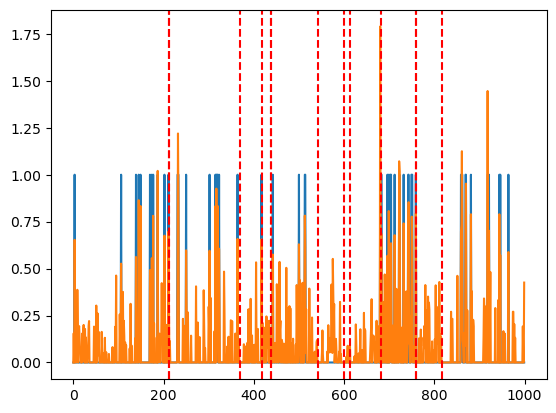

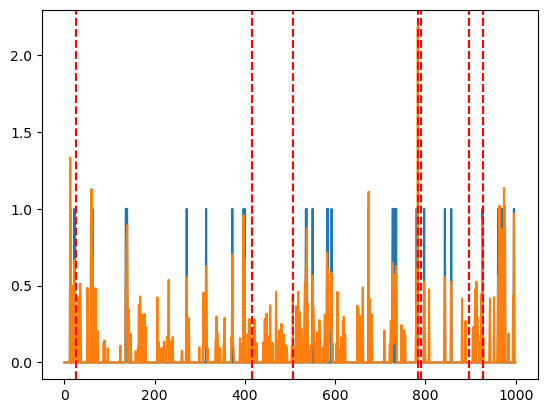

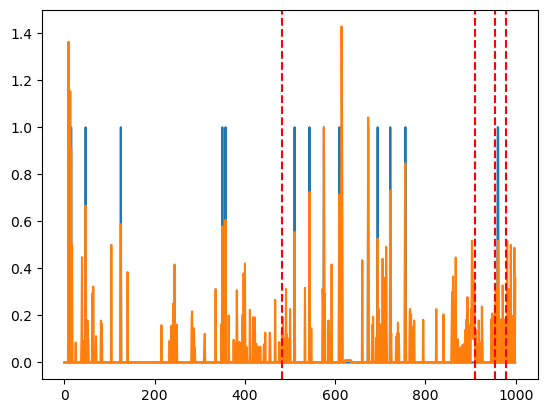

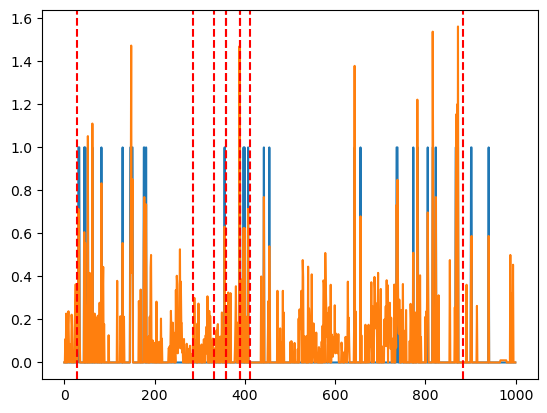

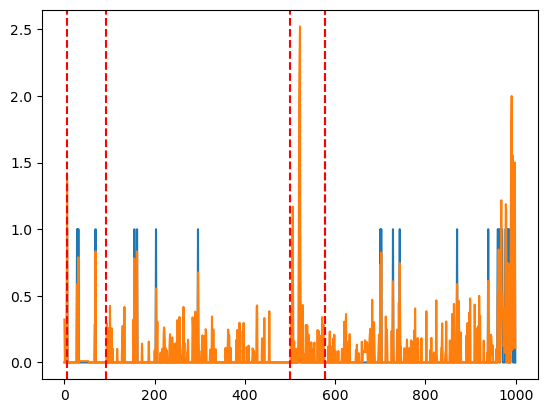

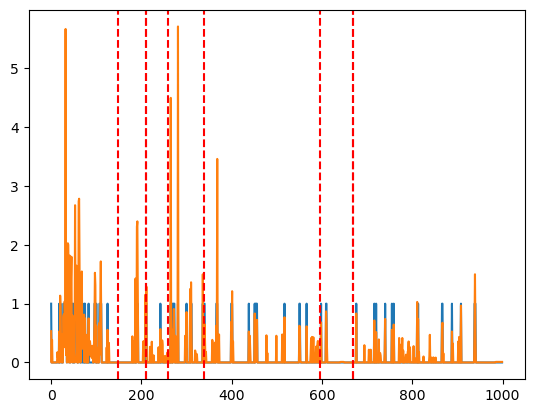

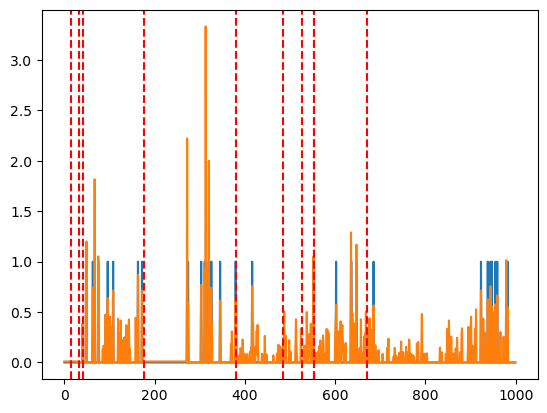

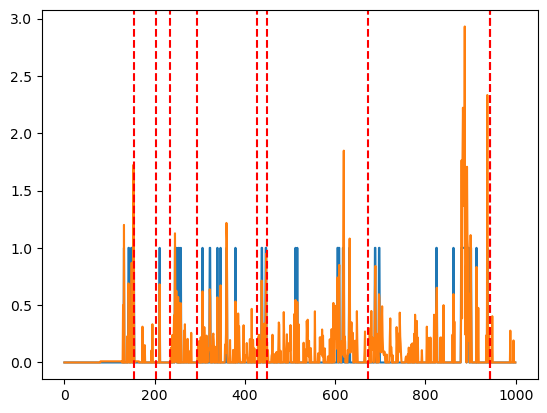

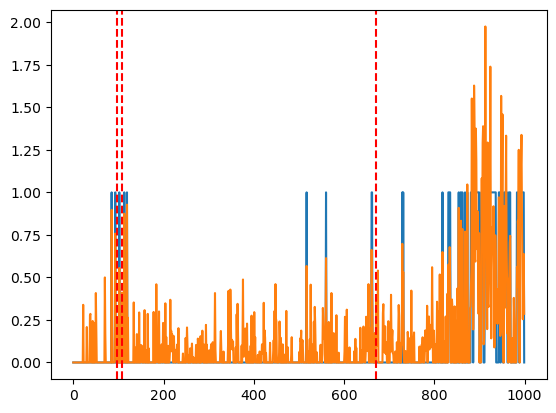

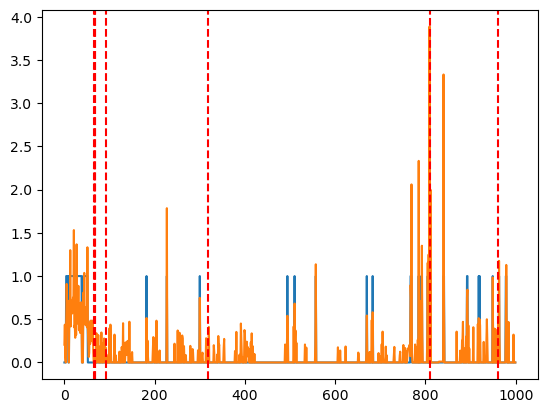

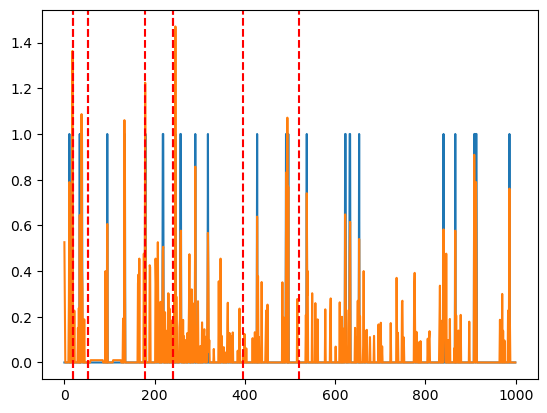

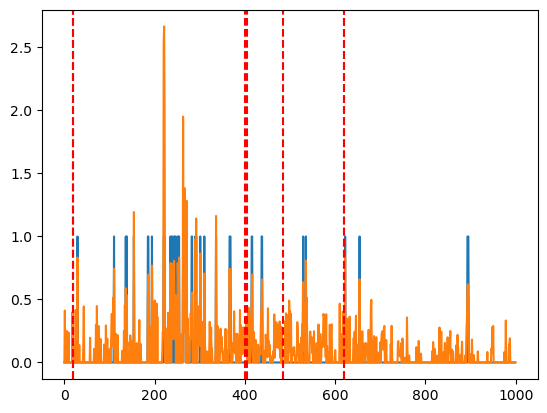

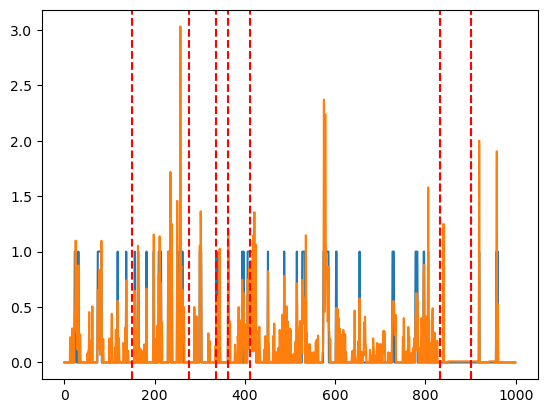

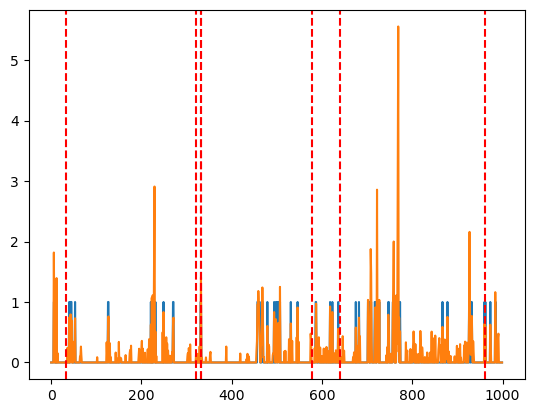

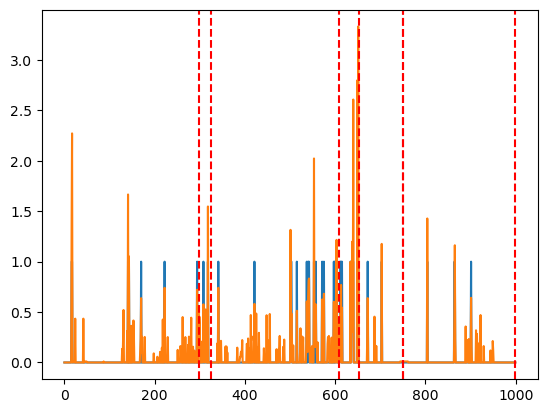

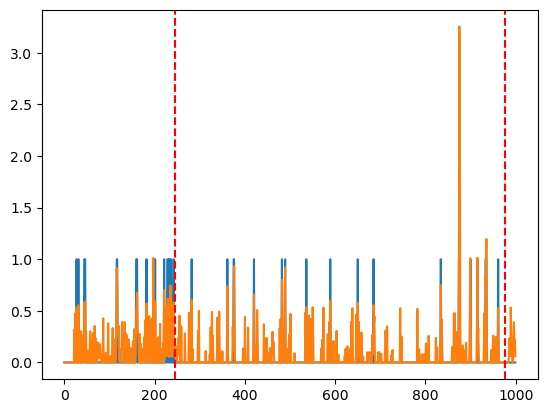

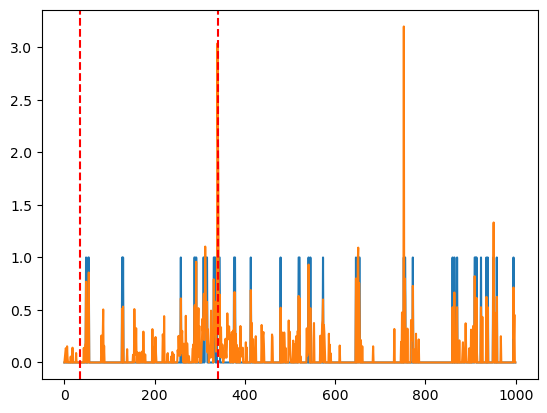

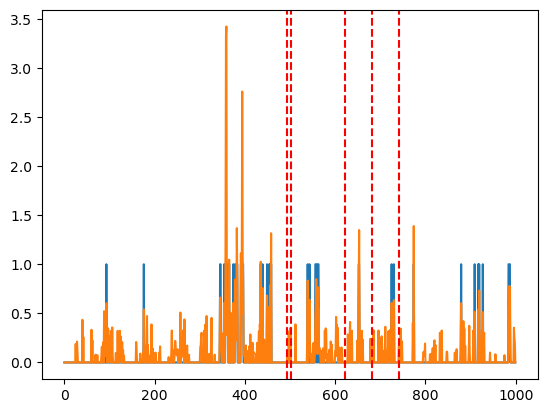

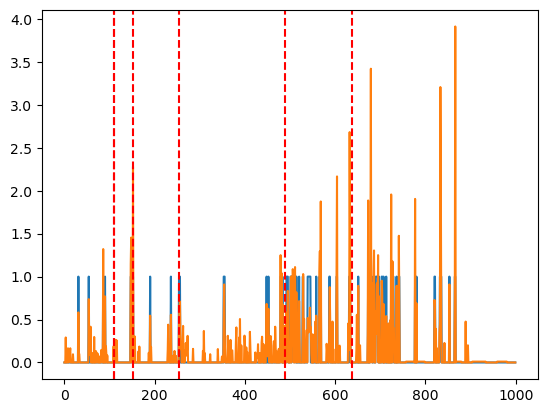

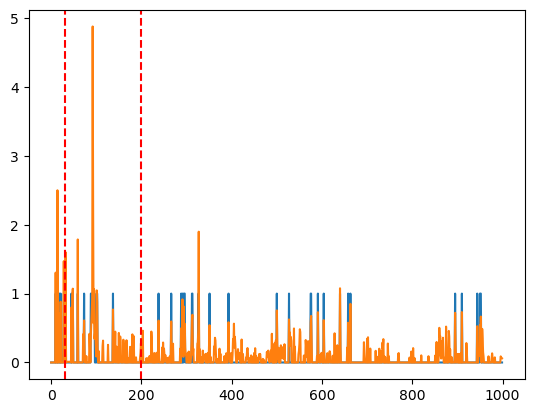

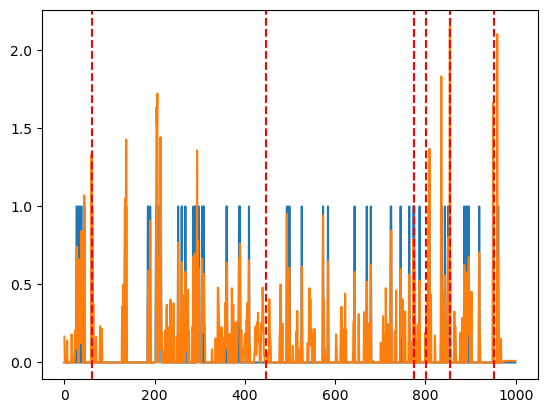

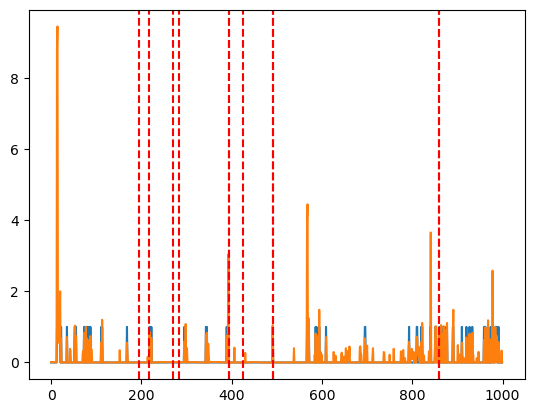

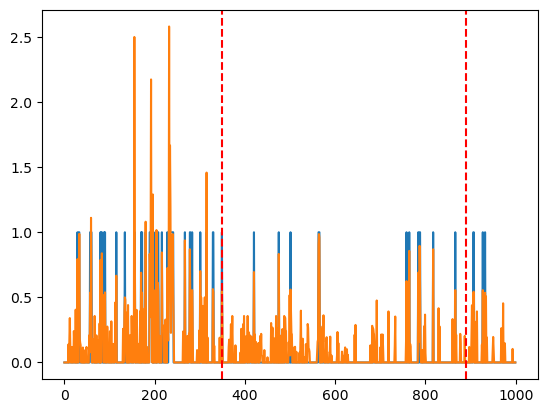

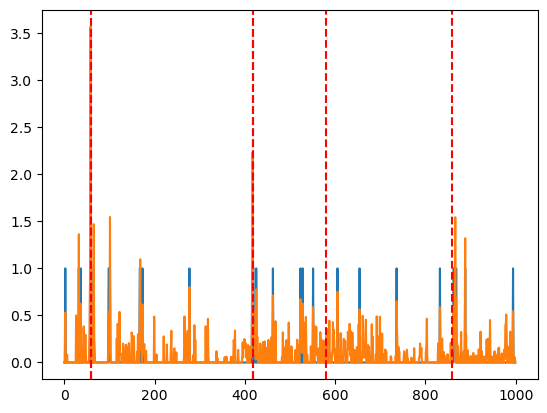

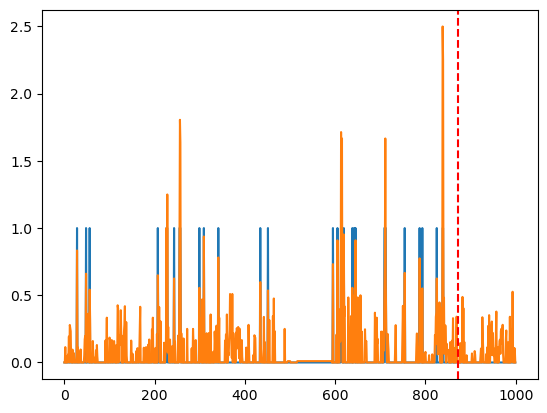

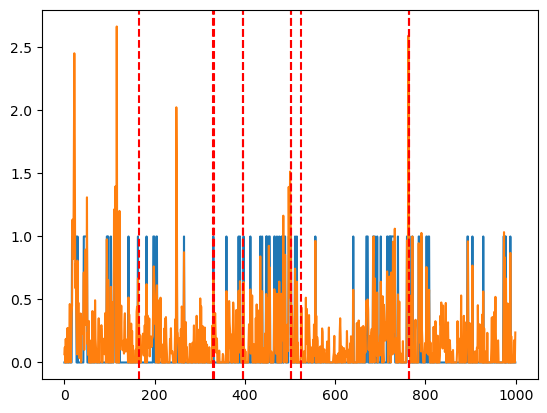

In [82]:
for idx,sequence in enumerate(list_of_sequences):
    sub_startco = list_of_startcos[idx]
    sub_endco = sub_startco + 1000*100
    inframe_motifs = chr1_motifs_array[((chr1_motifs_array>sub_startco) & (chr1_motifs_array<sub_endco))]
    state_sequence = model.predict(sequence)
    log_prob = model.log_probability(sequence)
#     state_names = [model.states[index].name for index in state_sequence]
    plt.plot([max(state-1,0) for state in state_sequence])
    plt.plot(sequence*10)
    for motif_coord in inframe_motifs:
        plt.axvline(x=(motif_coord-sub_startco)/100,color='r',linestyle='--')
    plt.show()
#     print("Most likely sequence of states:", state_sequence)
#     print("Log probability of the sequence:", log_prob)
#     print()

In [76]:
print(max(peak_call_prob))

1.1715364250418214e-06


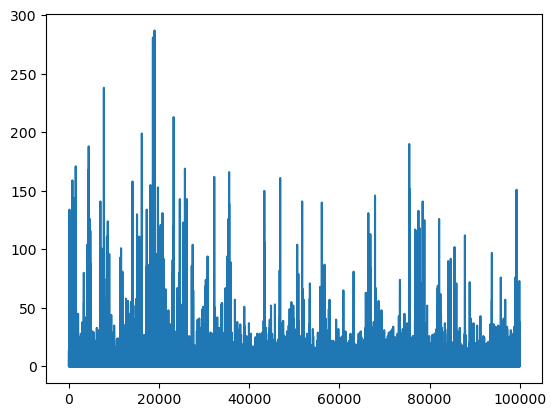

(array([9.8507e+04, 1.1180e+03, 1.9600e+02, 8.8000e+01, 4.8000e+01,
        3.0000e+01, 7.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  0. ,  28.7,  57.4,  86.1, 114.8, 143.5, 172.2, 200.9, 229.6,
        258.3, 287. ]),
 <BarContainer object of 10 artists>)

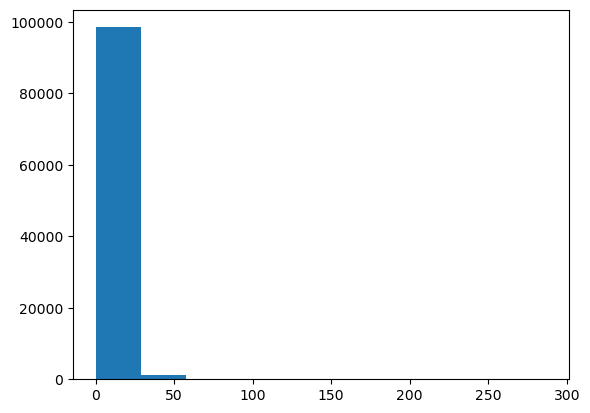

In [83]:
plt.plot(mod_data)
plt.show()
plt.hist(mod_data)